In [11]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=15,6

In [3]:
df = pd.read_csv('AirPassengers.csv')
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
# 2️⃣ Set 'Month' as the DataFrame index
df.set_index('Month', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [8]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


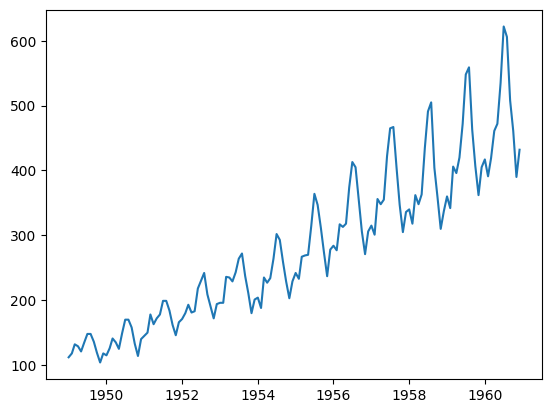

In [10]:
plt.plot(df['#Passengers'])
plt.show()

#### Deduced from Graph
- Increasing Trend
- Increasing Seasonality
- Therefore multiplicative decomposition

In [14]:
# Convert to timeseries

ts = df['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [16]:
# Checking indexing of data

ts['1949-01-01']

np.int64(112)

In [17]:
# Import datetime library and use 'datetime function

from datetime import datetime
ts[datetime(1949,1,1)]

np.int64(112)

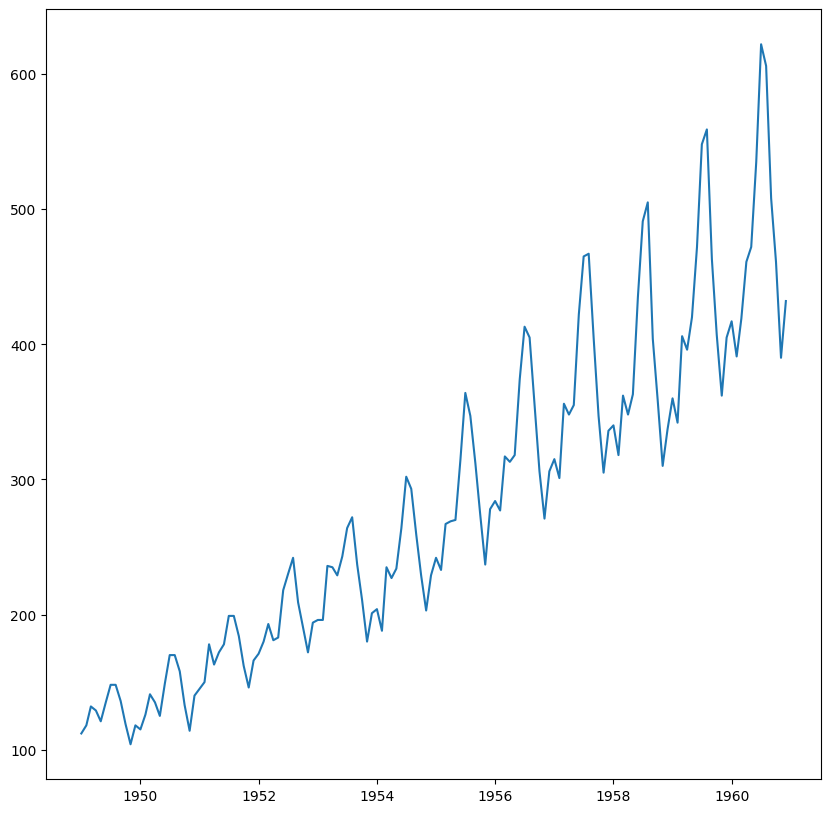

In [18]:
# Check Stationarity
plt.plot(ts)

##### Architecture of TSDA
- TS data
- Manual Visual Interpretation (Seasonality,Trend)
- Stationarity Test (ADF Test)
- if (Stationary) - Do Forecasting
- if (!Stationary) -Transformations (Diff, Log Transf , Double Log Trans)
- After each transformation again do stationarity test
- After Forecast 
- Inverse Transformation

##### Stationarity Test

In [33]:
# STATIONARITY TEST
# H0: TS is non-Stationary
# H1: TS is stationary

import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    #Determining rolling statistics
    #rolmean = pd.rolling_mean(timeseries,window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    # taking moving avg of 12 data points since year consists of 12 months
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue',label='original')
    mean = plt.plot(rolmean, color='red',label ='Rolling Mean')
    std = plt.plot(rolstd, color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    # Perform Dickey Fuller Test
    print("Results of Dickey Fuller Test")
    dftest= adfuller(timeseries,autolag ='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)


In [25]:
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

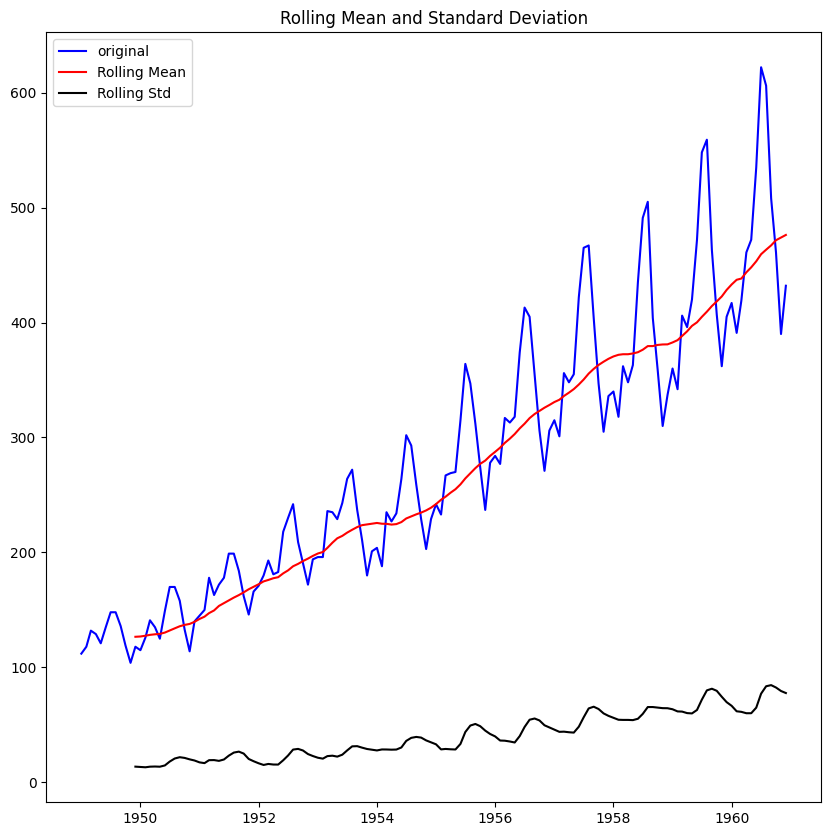

Results of Dickey Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [34]:
test_stationarity(ts)

##### Making Ts Stationary
- Log Transformation - log(x) -> e^(x)
- Differencing
- Double Log - log (log(x)) -> e^e^(x)
- Double Differencing
- Log + Differencing
- After forecasting is done, always use inverse transformation.

In [35]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [ ]:
# Log Transformation
ts_log = np.log(ts)


In [37]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

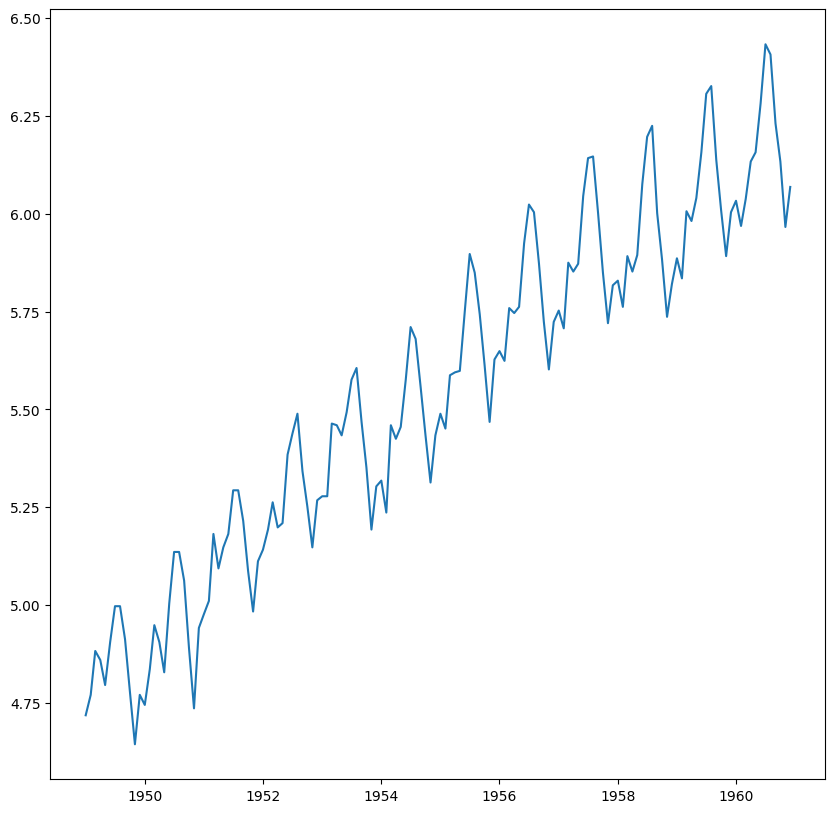

In [38]:
plt.plot(ts_log)

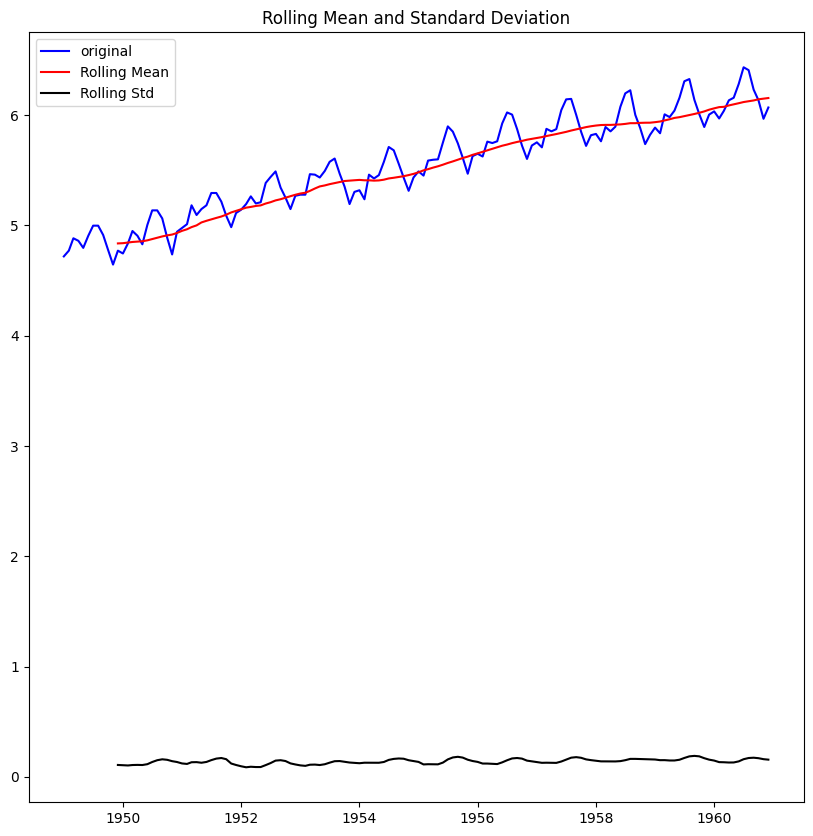

Results of Dickey Fuller Test
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [39]:
# Check Stationarity

test_stationarity(ts_log)

In [41]:
# Double Log

ts_doublelog = np.log(ts_log)


In [43]:
ts_doublelog

Month
1949-01-01    1.551491
1949-02-01    1.562490
1949-03-01    1.585719
1949-04-01    1.581000
1949-05-01    1.567739
                ...   
1960-08-01    1.857372
1960-09-01    1.829454
1960-10-01    1.813749
1960-11-01    1.786101
1960-12-01    1.803099
Name: #Passengers, Length: 144, dtype: float64

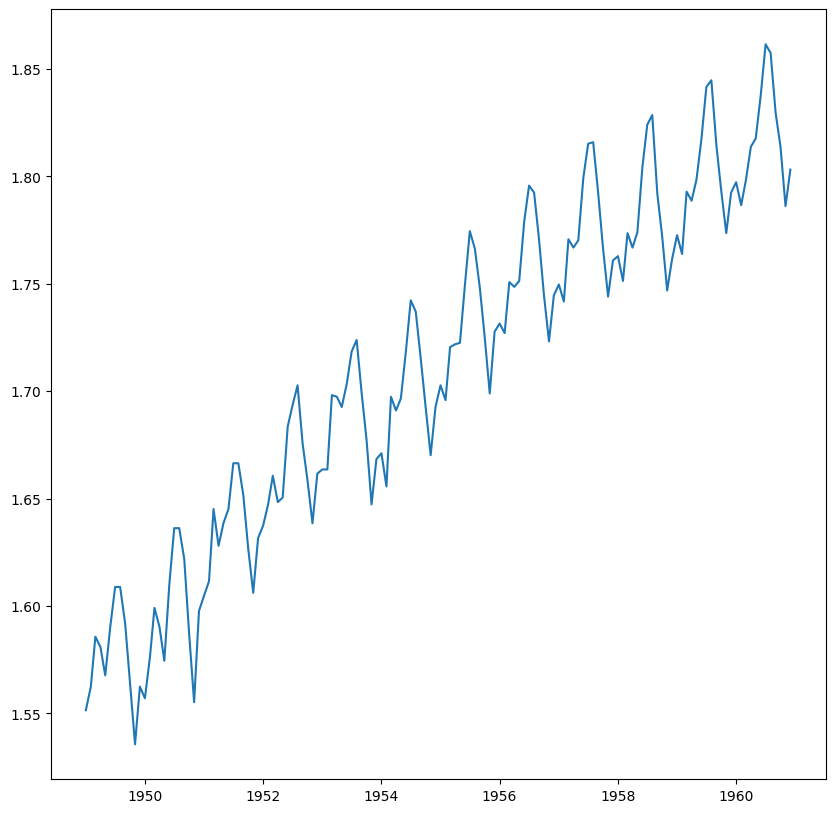

In [44]:
plt.plot(ts_doublelog)

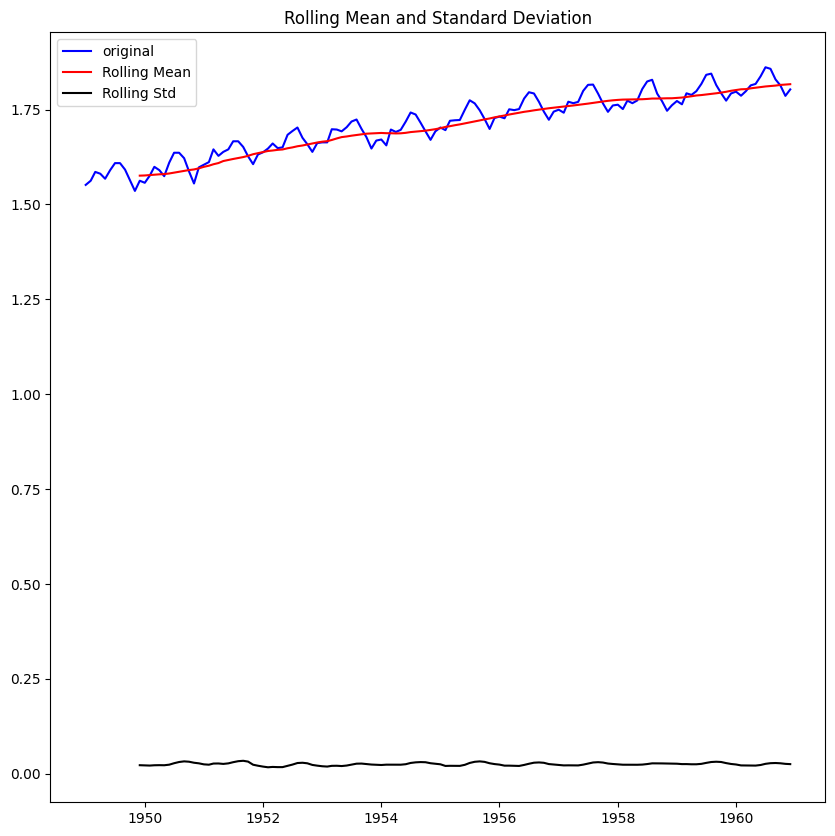

Results of Dickey Fuller Test
Test Statistic                  -2.156028
p-value                          0.222590
#Lags Used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [45]:
test_stationarity(ts_doublelog)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

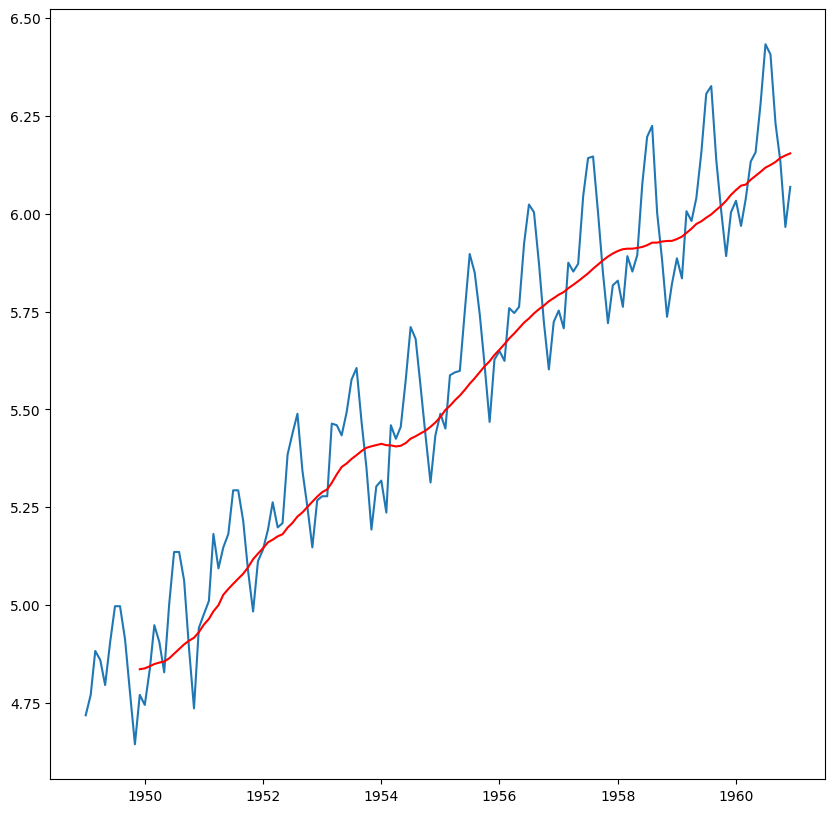

In [ ]:
# Smoothing
# Log- MA - Differencing

moving_Avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_Avg,color='red')

ts_log_moving_Avg_Diff = ts_log - moving_Avg
ts_log_moving_Avg_Diff.head(5)

ts_log_moving_Avg_Diff.dropna(inplace = True)
ts_log_moving_Avg_Diff.head(5)

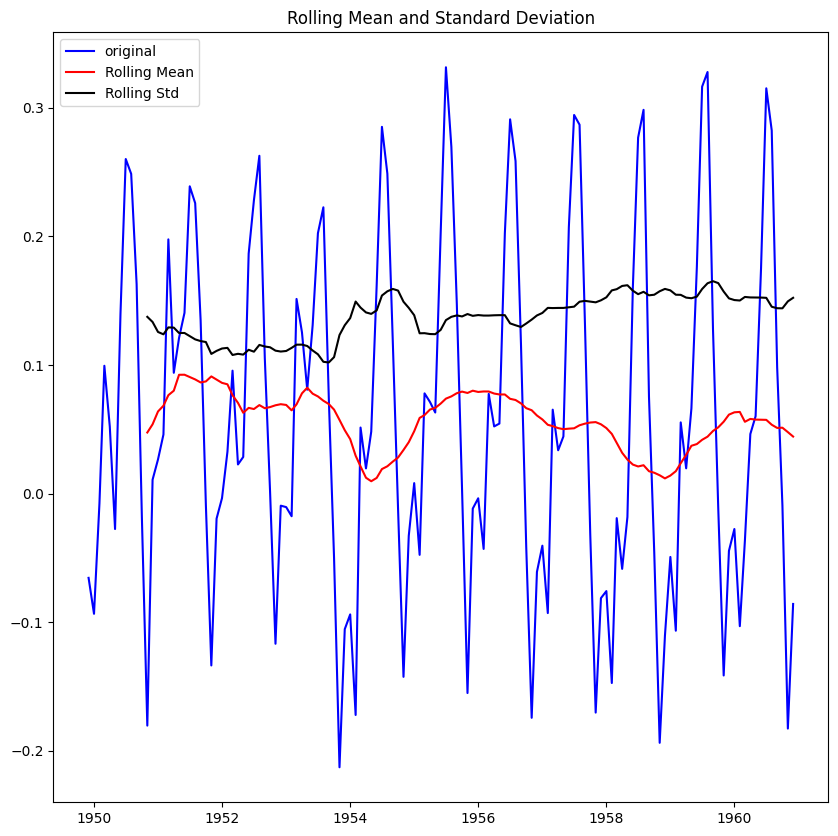

Results of Dickey Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [47]:
test_stationarity(ts_log_moving_Avg_Diff)

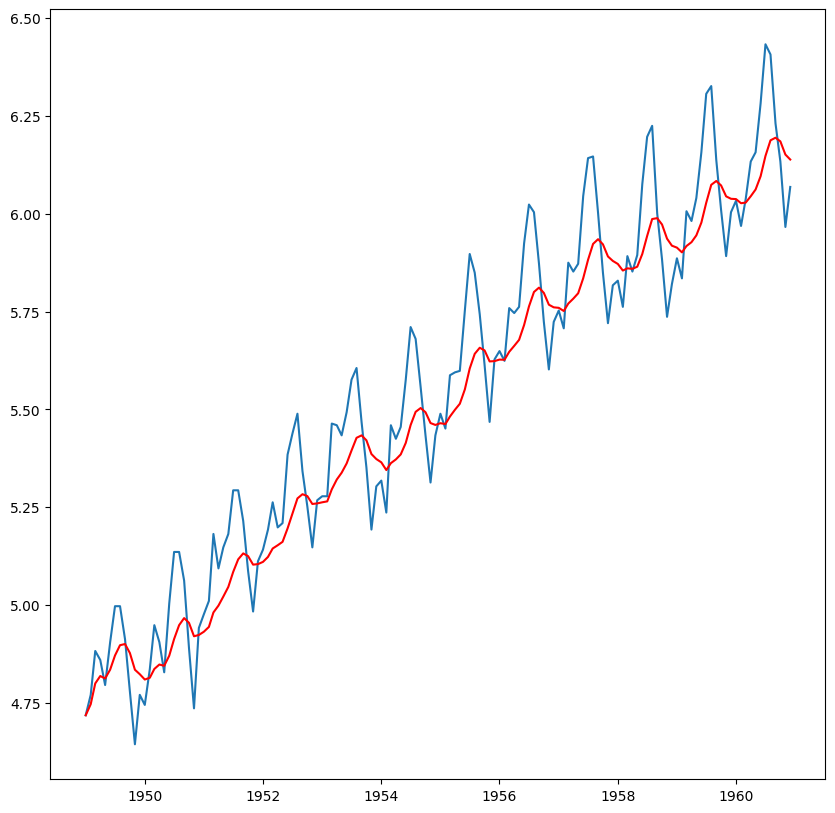

In [49]:
# Exponential Weighted Avg

expweighted_avg = ts_log.ewm(span=12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')

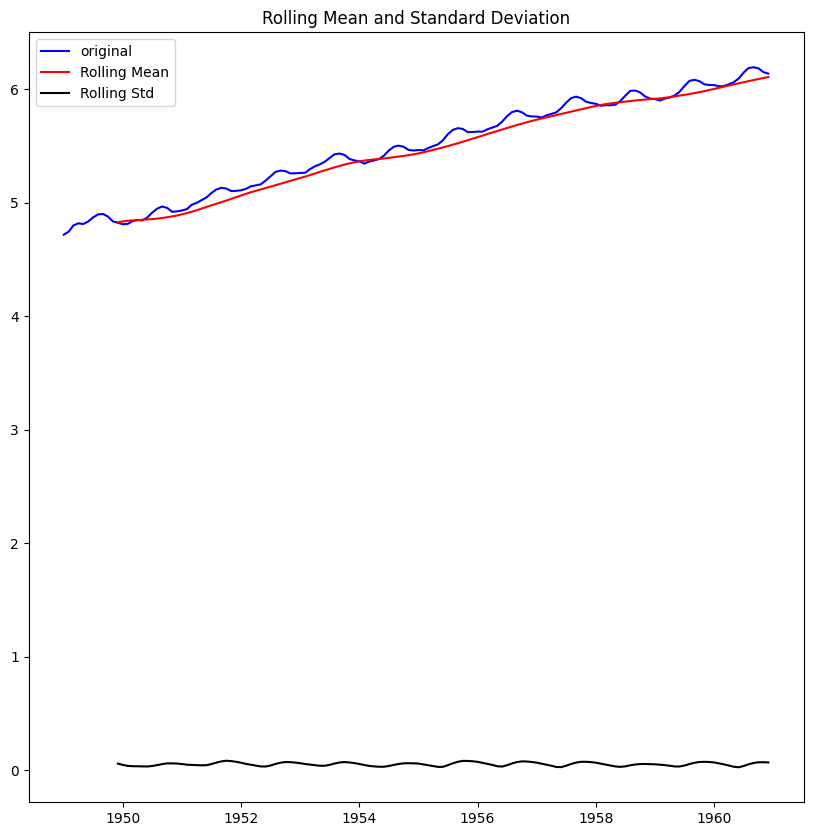

Results of Dickey Fuller Test
Test Statistic                  -2.477357
p-value                          0.121081
#Lags Used                      14.000000
Number of observations used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [50]:
test_stationarity(expweighted_avg)

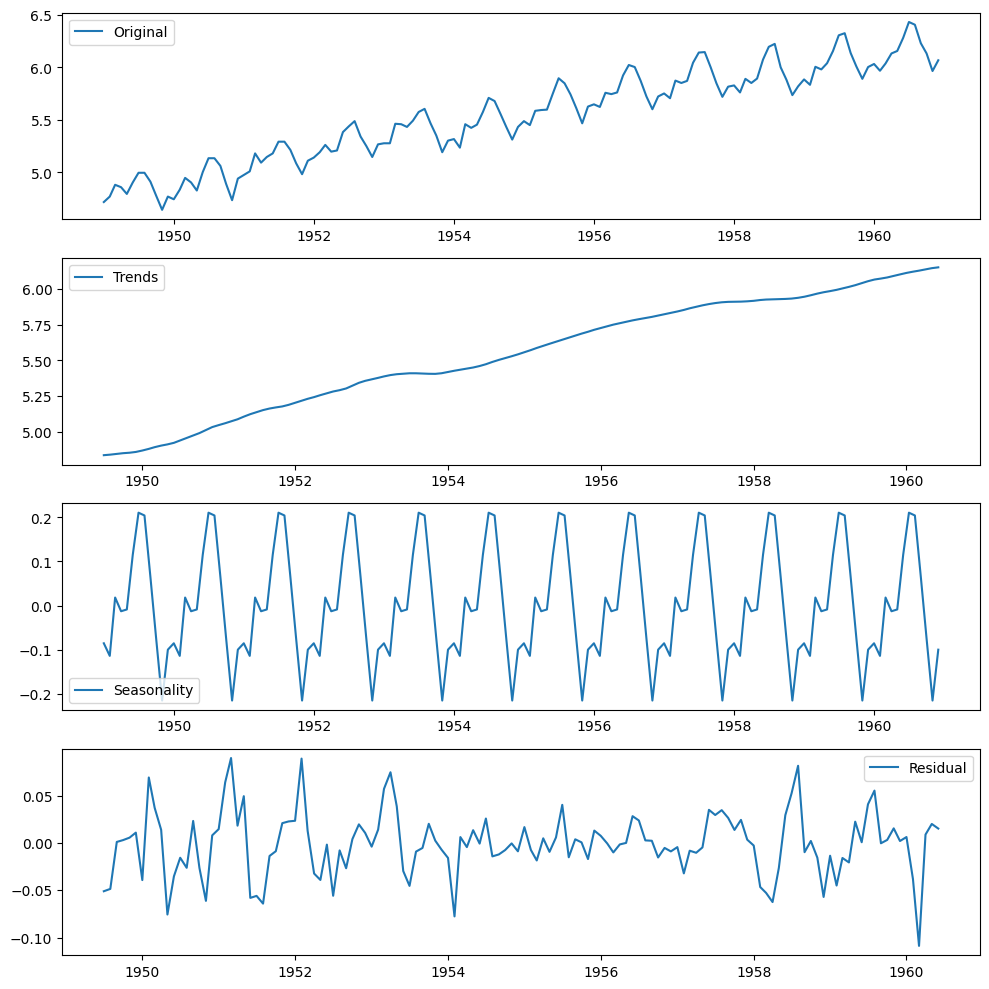

In [ ]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trends')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()


# remove trend , seasonality etc from ts = residual
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)




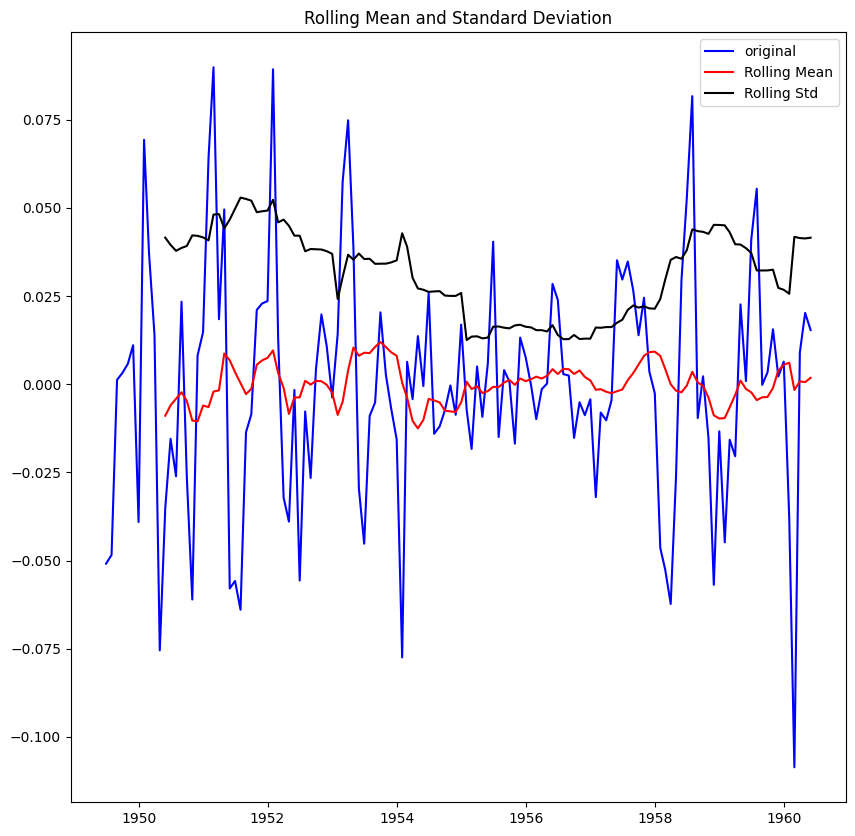

Results of Dickey Fuller Test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of observations used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [53]:
test_stationarity(ts_log_decompose)

p-value - 0.000002 something